# Cleaning

In [1]:
# load the packages

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
# read dataframe

dataFrame = pd.read_csv('/home/valentineiscoming/Pictures/ML BootCamp/Week5/Monday/project 2022 -Busara Mental Health Prediction Challenge/train.csv') 
data = dataFrame 

#view first five rows

data.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,...,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,...,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,...,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [3]:
# checking missing values

data.isnull().sum().sum()

10262

In [4]:
# checking missing values in each column

data.isnull().sum()

surveyid              0
village               0
survey_date           0
femaleres             0
age                   0
                     ..
saved_mpesa           0
amount_saved_mpesa    0
early_survey          0
depressed             0
day_of_week           0
Length: 75, dtype: int64

In [5]:
# more information on the columns with missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   surveyid                 1143 non-null   int64  
 1   village                  1143 non-null   int64  
 2   survey_date              1143 non-null   object 
 3   femaleres                1143 non-null   int64  
 4   age                      1143 non-null   float64
 5   married                  1143 non-null   int64  
 6   children                 1143 non-null   int64  
 7   hhsize                   1143 non-null   int64  
 8   edu                      1143 non-null   int64  
 9   hh_children              1143 non-null   int64  
 10  hh_totalmembers          809 non-null    float64
 11  cons_nondurable          1143 non-null   float64
 12  asset_livestock          1143 non-null   float64
 13  asset_durable            1143 non-null   float64
 14  asset_phone             

In [6]:
#remove unique features

data = data.drop('surveyid', axis=1) 
data = data.drop('village',axis = 1) 
data = data.drop('survey_date',axis = 1) 

data = data.drop('med_u5_deaths',axis = 1)
data = data.drop('med_expenses_sp_ep',axis = 1) 
data = data.drop('med_expenses_hh_ep',axis = 1)   

data = data.drop('asset_niceroof', axis = 1)
data = data.drop('med_child_check', axis = 1)
data = data.drop('med_vacc_newborns', axis = 1)
data = data.drop('wage_expenditures', axis = 1)

data.shape 

(1143, 65)

In [7]:
# remaining missing values

data.isnull().sum().sum()

7607

In [8]:
# list the columns

list(data.columns)

['femaleres',
 'age',
 'married',
 'children',
 'hhsize',
 'edu',
 'hh_children',
 'hh_totalmembers',
 'cons_nondurable',
 'asset_livestock',
 'asset_durable',
 'asset_phone',
 'asset_savings',
 'asset_land_owned_total',
 'cons_allfood',
 'cons_ownfood',
 'cons_alcohol',
 'cons_tobacco',
 'cons_med_total',
 'cons_med_children',
 'cons_ed',
 'cons_social',
 'cons_other',
 'ent_wagelabor',
 'ent_ownfarm',
 'ent_business',
 'ent_nonagbusiness',
 'ent_employees',
 'ent_nonag_revenue',
 'ent_nonag_flowcost',
 'ent_farmrevenue',
 'ent_farmexpenses',
 'ent_animalstockrev',
 'ent_total_cost',
 'fs_adskipm_often',
 'fs_adwholed_often',
 'fs_chskipm_often',
 'fs_chwholed_often',
 'fs_meat',
 'fs_enoughtom',
 'fs_sleephun',
 'med_expenses_child_ep',
 'med_portion_sickinjured',
 'med_port_sick_child',
 'med_afford_port',
 'med_sickdays_hhave',
 'med_healthconsult',
 'ed_expenses',
 'ed_expenses_perkid',
 'ed_schoolattend',
 'ed_sch_missedpc',
 'ed_work_act_pc',
 'labor_primary',
 'durable_investme

In [9]:
# Handling missing values

data['hh_totalmembers'].fillna(data['hh_totalmembers'].value_counts().idxmax(), inplace = True)
data['cons_alcohol'].fillna(data['cons_alcohol'].value_counts().idxmax(), inplace = True) 
data['cons_tobacco'].fillna(data['cons_tobacco'].value_counts().idxmax(), inplace = True)
data['cons_med_total'].fillna(data['cons_med_total'].value_counts().idxmax(), inplace = True)  
data['fs_chwholed_often'].fillna(data['fs_chwholed_often'].value_counts().idxmax(), inplace = True)
data['fs_meat'].fillna(data['fs_meat'].value_counts().idxmax(), inplace = True)  
data['fs_enoughtom'].fillna(data['fs_enoughtom'].value_counts().idxmax(), inplace = True)
data['fs_sleephun'].fillna(data['fs_sleephun'].value_counts().idxmax(), inplace = True)  


data['fs_chskipm_often'].fillna(data['fs_chskipm_often'].mean(), inplace = True) 
data['med_expenses_child_ep'].fillna(data['med_expenses_child_ep'].mean(), inplace = True) 
data['med_portion_sickinjured'].fillna(data['med_portion_sickinjured'].mean(), inplace = True) 
data['med_port_sick_child'].fillna(data['med_port_sick_child'].mean(), inplace = True) 
data['med_afford_port'].fillna(data['med_afford_port'].mean(), inplace = True) 
data['med_sickdays_hhave'].fillna(data['med_sickdays_hhave'].mean(), inplace = True) 
data['med_healthconsult'].fillna(data['med_healthconsult'].mean(), inplace = True) 
data['ed_expenses'].fillna(data['ed_expenses'].mean(), inplace = True)
data['ed_expenses_perkid'].fillna(data['ed_expenses_perkid'].mean(), inplace = True) 
data['ed_sch_missedpc'].fillna(data['ed_sch_missedpc'].mean(), inplace = True)  
data['ed_work_act_pc'].fillna(data['ed_work_act_pc'].mean(), inplace = True) 

data['cons_med_children'].fillna(data['cons_med_children'].median(), inplace = True)
data['ed_schoolattend'].fillna(data['ed_schoolattend'].median(), inplace = True) 

# viewing missing values

data.isnull().sum().sum()

0

# Feature Engineering

In [10]:
# import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [11]:
# feature scalling by using minmaxscaler method 
scaler = MinMaxScaler(feature_range=(0, 1))

feat_col =[ 'age', 'ent_employees', 'married', 'edu', 'cons_alcohol','fs_adwholed_often',
       'fs_chskipm_often', 'fs_chwholed_often'] 
        
scaled_data = scaler.fit_transform(data[feat_col].values.reshape(-1,1))

In [12]:
import joblib 
 
joblib.dump(scaler, "/home/valentineiscoming/Pictures/ML BootCamp/Week5/Monday/project 2022 -Busara Mental Health Prediction Challenge/Scaler.pkl")

['/home/valentineiscoming/Pictures/ML BootCamp/Week5/Monday/project 2022 -Busara Mental Health Prediction Challenge/Scaler.pkl']

In [13]:
scaled_data

array([[0.2675026 ],
       [0.        ],
       [0.00955366],
       ...,
       [0.        ],
       [0.02770168],
       [0.        ]])

In [14]:
scaled_data = pd.DataFrame(scaled_data.reshape(-1,8),columns = feat_col) 
print(scaled_data)

           age  ent_employees   married       edu  cons_alcohol  \
0     0.267503            0.0  0.009554  0.095537           0.0   
1     0.219734            0.0  0.009554  0.076429           0.0   
2     0.210181            0.0  0.009554  0.085983           0.0   
3     0.257949            0.0  0.009554  0.095537           0.0   
4     0.563666            0.0  0.000000  0.095537           0.0   
...        ...            ...       ...       ...           ...   
1138  0.343932            0.0  0.000000  0.085983           0.0   
1139  0.219734            0.0  0.009554  0.095537           0.2   
1140  0.267503            0.0  0.009554  0.095537           0.0   
1141  0.315271            0.0  0.000000  0.085983           0.0   
1142  0.372593            0.0  0.009554  0.114644           0.0   

      fs_adwholed_often  fs_chskipm_often  fs_chwholed_often  
0              0.000000          0.027702                0.0  
1              0.000000          0.027702                0.0  
2     

# Feature selection

In [15]:
# import packages 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [16]:
#split dataset into features and target
target = data['depressed']
features = scaled_data

In [17]:
#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)

#train to find best features
fit = bestfeatures.fit(features,target)

#save in the dataframe 
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

#naming the dataframe columns
featureScores.columns = ['Specs','Score'] 

#print 20 best features 
print(featureScores.nlargest(8,'Score'))  

               Specs     Score
5  fs_adwholed_often  1.660397
4       cons_alcohol  0.761584
0                age  0.598460
7  fs_chwholed_often  0.354997
3                edu  0.153409
6   fs_chskipm_often  0.095109
1      ent_employees  0.033194
2            married  0.015323


In [18]:
#import package 
from sklearn.ensemble import ExtraTreesClassifier

[0.47452296 0.00951546 0.0207287  0.22826298 0.05395346 0.06988944
 0.1078736  0.03525342]


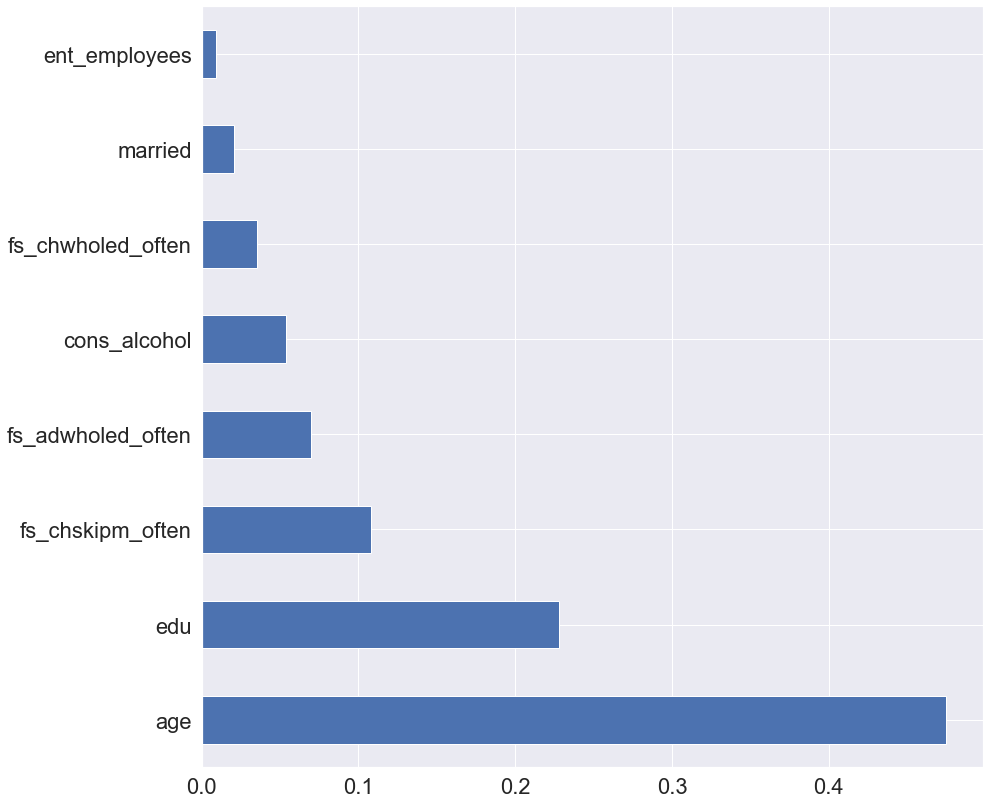

In [19]:
#create model for training 
model = ExtraTreesClassifier()
model.fit(features,target)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_) 

#plot graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=features.columns)

# show the first 30 important features 

fig= plt.figure(figsize=(14,14))
sns.set(font_scale = 2)
feature_importances.nlargest(20).plot(kind ='barh')
plt.show() 

<AxesSubplot:>

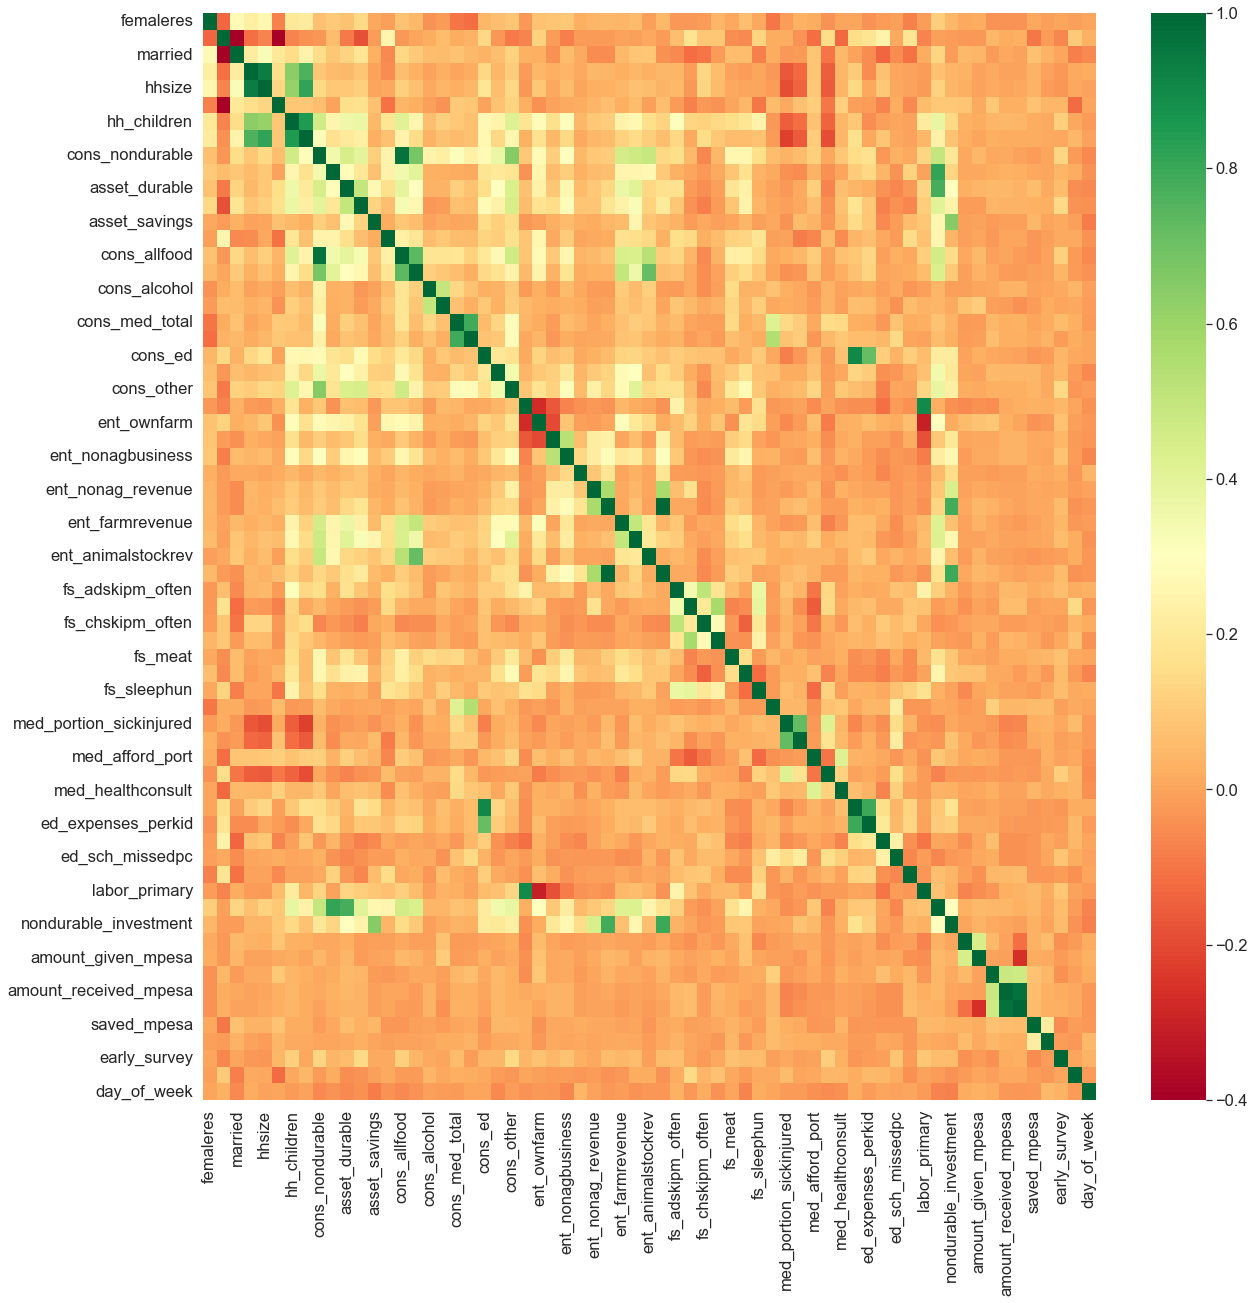

In [20]:
#get correlations of each features in dataset
plt.figure(figsize=(20,20))

#plot heat map
sns.set(font_scale = 1.5)
# to show number set annot=True
d = sns.heatmap(data.corr(),annot=False, cmap="RdYlGn")

#save the figure 
figure = d.get_figure()
figure.savefig("heatmap_output.png")

# show the heatamp graph 
d   

In [21]:
# SHOW CORRELATION OF DATA TO THE TARGET COLUMN 
features_corr = pd.DataFrame(abs(data.corr()['depressed']).sort_values(ascending = False)) 

features_corr 

,depressed
depressed,1.000000
fs_adwholed_often,0.143458
edu,0.122236
age,0.100159
married,0.078541
...,...
labor_primary,0.004050
med_port_sick_child,0.003375
amount_given_mpesa,0.000751
early_survey,0.000694


# Machine Learning Model

In [22]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()


re_features,re_target = oversample.fit_resample(features,target)

## 5. Histogram Gradient Boosting

In [23]:
# evaluate Histogram gradient boosting algorithm for classification 
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score

# explicitly requires this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting

# split the data test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(re_features,re_target,stratify=re_target,test_size=0.25,random_state=42)

# define the model
mymodel = HistGradientBoostingClassifier(loss= "auto")

#fit the model
mymodel.fit(x_train,y_train)

# evaluate the model
y_predicts = mymodel.predict(x_test)

# checking the accuracy
print("Accuracy :", accuracy_score(y_test,y_predicts))
print(f'Error rate:{1-accuracy_score(y_test,y_predicts)}')

/home/valentineiscoming/anaconda3/lib/python3.9/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
/home/valentineiscoming/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_hist_gradient_boosting/gradient_boosting.py:1823: FutureWarning: The loss 'auto' was deprecated in v1.1 and will be removed in version 1.3. Use 'log_loss' which is equivalent.
  warnings.warn(


Accuracy : 0.848421052631579
Error rate:0.15157894736842104


In [24]:
joblib.dump(mymodel, "//home/valentineiscoming/Pictures/ML BootCamp/Week5/Monday/project 2022 -Busara Mental Health Prediction Challenge/ModelHist.pkl")

['//home/valentineiscoming/Pictures/ML BootCamp/Week5/Monday/project 2022 -Busara Mental Health Prediction Challenge/ModelHist.pkl']

/home/valentineiscoming/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


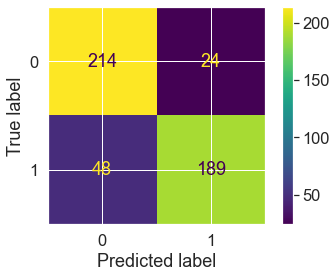

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mymodel,x_test,y_test)
plt.show()